#### Drzewa decyzyjne

Poniższy przykład opiera się na danych dotyczących zdolności kredytowej

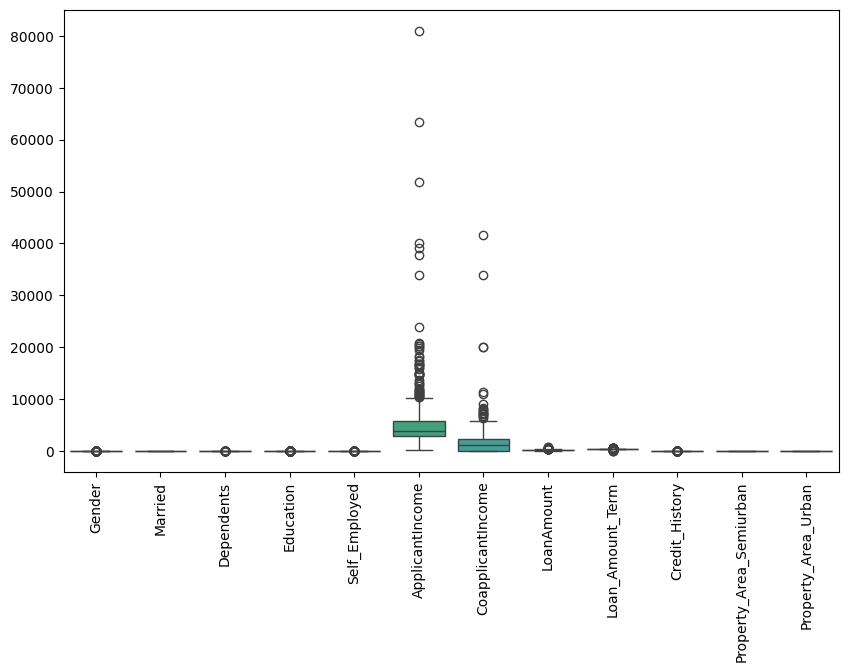

Model: kNN unscaled
[[ 7 26]
 [17 73]]
Accuracy:  65.04%, Sensivity:  21.21%, Specificity:  81.11%, F1 Score:  77.25%
Model: SVM unscaled
[[ 0 33]
 [ 0 90]]
Accuracy:  73.17%, Sensivity:  0.0%, Specificity:  100.0%, F1 Score:  84.51%
Model: kNN scaled
[[15 18]
 [11 79]]
Accuracy:  76.42%, Sensivity:  45.45%, Specificity:  87.78%, F1 Score:  84.49%
Model: SVM scaled
[[14 19]
 [ 3 87]]
Accuracy:  82.11%, Sensivity:  42.42%, Specificity:  96.67%, F1 Score:  88.78%
Decision Tree
[[14 19]
 [ 5 85]]
Accuracy:  80.49%, Sensivity:  42.42%, Specificity:  94.44%, F1 Score:  87.63%


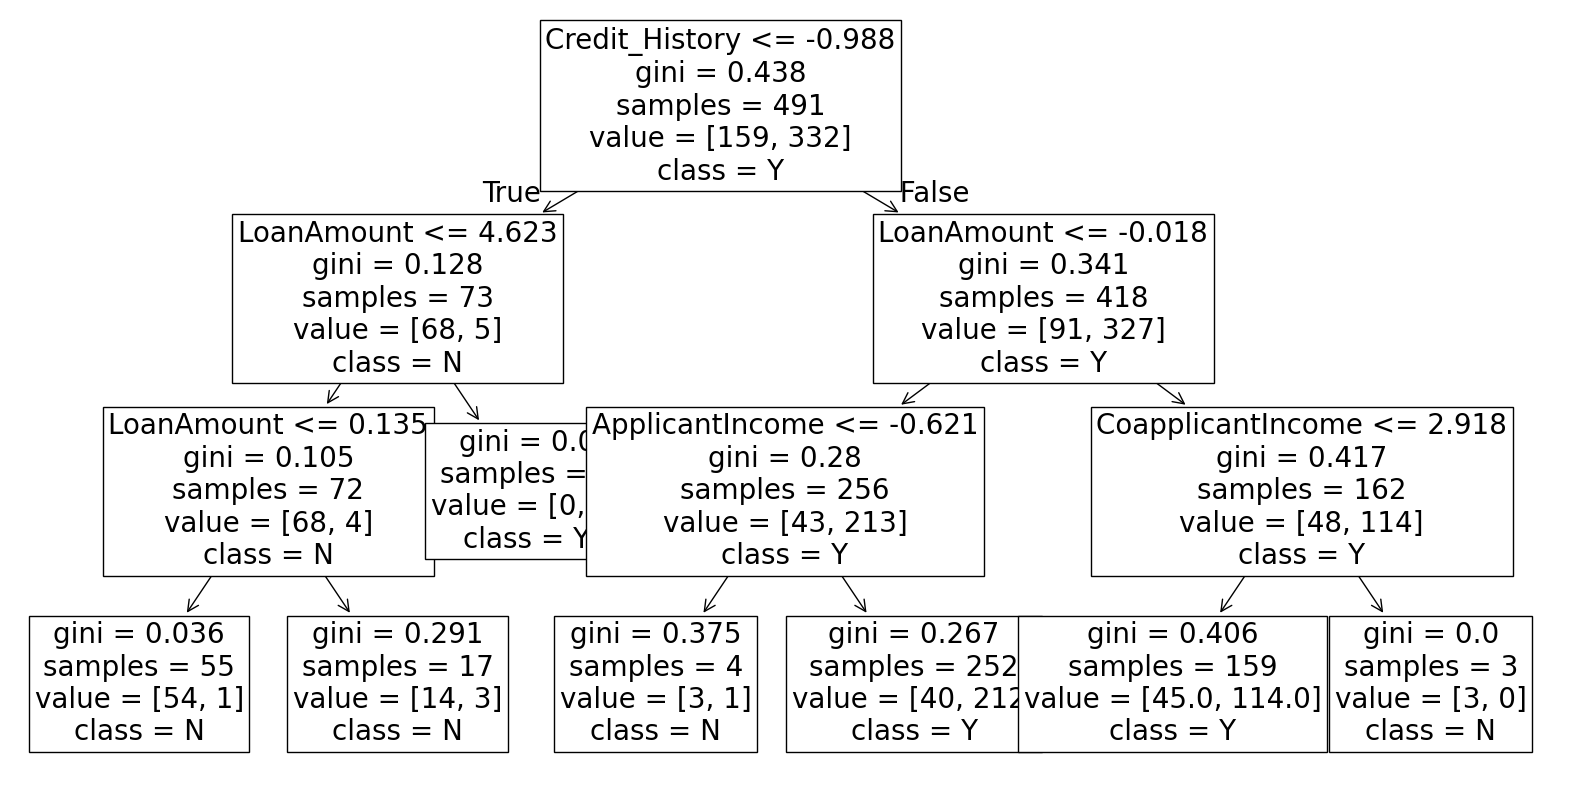

In [63]:
import pandas as pd
import warnings

def qualitativeToBinary(data, column, value):
    data[column] = data[column].apply(lambda x: 1 if x == value else 0)

def printASSvalues(cm):
    print(cm)
    #print acc, sensitivity and specificity but as a percentage in xx.xx format in a single line
    print("Accuracy: ", round((cm[0][0] + cm[1][1]) / len(y_test)*100, 2), end="%, ")
    print("Sensivity: ", round(cm[0][0] / (cm[0][0] + cm[0][1])*100, 2), end="%, ")
    print("Specificity: ", round(cm[1][1] / (cm[1][0] + cm[1][1])*100, 2), end="%, ")
    print("F1 Score: ", round(2*cm[1][1] / (2*cm[1][1] + cm[0][1] + cm[1][0])*100, 2), end="%\n")

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load data
data = pd.read_excel('practice_lab_3.xlsx')

columns = data.columns
# print(columns)

# Preprocess categorical variables
qualitativeToBinary(data, 'Gender', 'Female')
qualitativeToBinary(data, 'Married', 'Yes')
qualitativeToBinary(data, 'Education', 'Graduate')
qualitativeToBinary(data, 'Self_Employed', 'Yes')
qualitativeToBinary(data, 'Loan_Status', 'Y')

# One-hot encode 'Property_Area'
data = pd.get_dummies(data, columns=['Property_Area'], drop_first=True)

# Split data into features and target variable
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']

# print(X.head())  # Check processed features
# print(y.head())  # Check target variable

# Print the value spread of each column
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.show()

# imports
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.svm import SVC as SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# models
models = [(kNN(), "kNN"), (SVM(), "SVM")]

# Train and test models
for model, name in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name} unscaled")
    cm = confusion_matrix(y_test, y_pred)
    printASSvalues(cm)

# Scale data and test models again
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
for model, name in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name} scaled")
    cm = confusion_matrix(y_test, y_pred)
    printASSvalues(cm)
    
# Decision Tree
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.tree import plot_tree
model = DT(max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Decision Tree")
cm = confusion_matrix(y_test, y_pred)
printASSvalues(cm)

plt.figure(figsize=(20,10))
tree_vis = plot_tree(model,feature_names=
data.columns[:-1].to_list(),
class_names=['N', 'Y'], fontsize = 20)
plt.show()



In [64]:
# Przetestuj algorytmy kNN oraz SVM z różnymi parametrami:
# kNN – liczba sąsiadów (n_neighbors), sposób wyznaczania wag (‘uniform’, ‘distance’),
# SVM – jądro (kernel).

    
def testKNN(X_train, X_test, y_train, y_test, n_neighbors, weights):
    model = kNN(n_neighbors=n_neighbors, weights=weights)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: kNN, n_neighbors={n_neighbors}, weights={weights}")
    cm = confusion_matrix(y_test, y_pred)
    printASSvalues(cm)
    
def testSVM(X_train, X_test, y_train, y_test, kernel):
    model = SVM(kernel=kernel)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: SVM, kernel={kernel}")
    cm = confusion_matrix(y_test, y_pred)
    printASSvalues(cm)

testKNN(X_train, X_test, y_train, y_test, 3, 'uniform')
testKNN(X_train, X_test, y_train, y_test, 3, 'distance')
testKNN(X_train, X_test, y_train, y_test, 5, 'uniform')
testKNN(X_train, X_test, y_train, y_test, 5, 'distance')

testSVM(X_train, X_test, y_train, y_test, 'linear')
testSVM(X_train, X_test, y_train, y_test, 'poly')
testSVM(X_train, X_test, y_train, y_test, 'rbf')
testSVM(X_train, X_test, y_train, y_test, 'sigmoid')


Model: kNN, n_neighbors=3, weights=uniform
[[15 18]
 [13 77]]
Accuracy:  74.8%, Sensivity:  45.45%, Specificity:  85.56%, F1 Score:  83.24%
Model: kNN, n_neighbors=3, weights=distance
[[16 17]
 [15 75]]
Accuracy:  73.98%, Sensivity:  48.48%, Specificity:  83.33%, F1 Score:  82.42%
Model: kNN, n_neighbors=5, weights=uniform
[[15 18]
 [11 79]]
Accuracy:  76.42%, Sensivity:  45.45%, Specificity:  87.78%, F1 Score:  84.49%
Model: kNN, n_neighbors=5, weights=distance
[[16 17]
 [12 78]]
Accuracy:  76.42%, Sensivity:  48.48%, Specificity:  86.67%, F1 Score:  84.32%
Model: SVM, kernel=linear
[[14 19]
 [ 2 88]]
Accuracy:  82.93%, Sensivity:  42.42%, Specificity:  97.78%, F1 Score:  89.34%
Model: SVM, kernel=poly
[[15 18]
 [ 3 87]]
Accuracy:  82.93%, Sensivity:  45.45%, Specificity:  96.67%, F1 Score:  89.23%
Model: SVM, kernel=rbf
[[14 19]
 [ 3 87]]
Accuracy:  82.11%, Sensivity:  42.42%, Specificity:  96.67%, F1 Score:  88.78%
Model: SVM, kernel=sigmoid
[[15 18]
 [ 2 88]]
Accuracy:  83.74%, Sen

In [65]:
def testScaler(X_train, X_test, y_train, y_test, scalerType):
    scaler = scalerType()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    model = kNN()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: kNN, scaler={scalerType}")
    cm = confusion_matrix(y_test, y_pred)
    printASSvalues(cm)

from sklearn.preprocessing import MinMaxScaler, RobustScaler, MaxAbsScaler
testScaler(X_train, X_test, y_train, y_test, MinMaxScaler)
testScaler(X_train, X_test, y_train, y_test, RobustScaler)
testScaler(X_train, X_test, y_train, y_test, MaxAbsScaler)


Model: kNN, scaler=<class 'sklearn.preprocessing._data.MinMaxScaler'>
[[14 19]
 [ 8 82]]
Accuracy:  78.05%, Sensivity:  42.42%, Specificity:  91.11%, F1 Score:  85.86%
Model: kNN, scaler=<class 'sklearn.preprocessing._data.RobustScaler'>
[[17 16]
 [ 6 84]]
Accuracy:  82.11%, Sensivity:  51.52%, Specificity:  93.33%, F1 Score:  88.42%
Model: kNN, scaler=<class 'sklearn.preprocessing._data.MaxAbsScaler'>
[[12 21]
 [10 80]]
Accuracy:  74.8%, Sensivity:  36.36%, Specificity:  88.89%, F1 Score:  83.77%
